In [18]:
from sklearn.datasets import make_regression
import numpy as np
import matplotlib.pyplot as plt

In [37]:
X, y, coef = make_regression(n_samples=100, n_features=2, noise=5, random_state=42, coef=True)

In [38]:
coef

array([87.73730719, 74.07686178])

In [39]:
# plt.scatter(X, y)

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [42]:
# plt.scatter(X_train, y_train)

In [43]:
model = LinearRegression()

In [44]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [45]:
model.coef_, model.intercept_

(array([87.05053156, 73.98312283]), -0.3217386750092768)

In [46]:
# plt.scatter(X_train, y_train)

# plt.scatter(X_test, model.predict(X_test))

In [49]:
class LinearRegCustom:
    
    def __init__(self, lr=.01, max_iters=20):
        self.lr = lr
        self.max_iters = max_iters
        
        
    def fit(self, X, y):
        
        self.coef_ = np.random.randn(1, X.shape[1])
        self.intercept_ = np.random.random()
        
        errs = []
        for i in range(self.max_iters):
            #this line have been added for mini batch
            indices = np.random.randint(0, len(X), len(X)//10)
            self.gradient_decend(X[indices], y[indices])
            errs.append(self.error(X, y))
        
        return errs
            
    
    def gradient_decend(self, X, y):
        delta_coef, delta_inter = self.gradient(X, y)
        print(delta_coef)
        self.coef_ += delta_coef
        self.intercept_ += delta_inter
        
    def gradient(self, X, y):
        ya = y.reshape(-1, 1)
        yh = self.predict(X)
        e = yh - ya
        
        de2m = np.dot(e.T, X)/len(X)
        de2c = np.mean(e * 1)
        
        return -de2m*self.lr, -de2c*self.lr
    
    def error(self, X, y):
        ya = y.reshape(-1, 1)
        yh = self.predict(X)
        e = yh - ya
        return np.mean(e**2)
        
    def predict(self, X):
        return np.dot(X, self.coef_.T) + self.intercept_

[[5.30699825 2.67766416]]
[[2.9394266  7.36550539]]
[[7.57768885 4.76884255]]
[[7.77066733 9.10639068]]
[[ 6.59910867 10.14431753]]
[[9.52502549 1.80289277]]
[[5.07622827 8.3790291 ]]
[[ 6.39942532 -0.8980657 ]]
[[6.22310474 3.23814759]]
[[0.61068822 2.55313131]]
[[3.78847547 0.70268574]]
[[0.74021439 3.00869224]]
[[ 3.34811902 -0.69975926]]
[[3.66248361 0.68397505]]
[[0.48958367 5.61667399]]
[[0.61096689 1.51246263]]
[[2.24438826 1.79774236]]
[[1.48244623 0.84547687]]
[[1.40034729 1.17516426]]
[[0.95089433 1.77075346]]


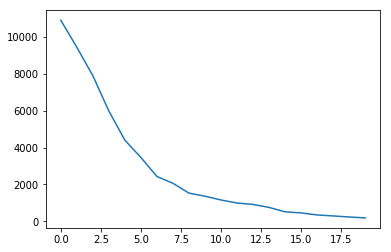

In [51]:
m2 = LinearRegCustom(lr=.1)

errors = m2.fit(X_train, y_train)

plt.figure()
plt.plot(errors)
plt.show()

In [31]:
m2.error(X_test, y_test)

31.197723071150193

In [32]:
m2.predict(X_test[:10])

array([[ 180.39058242],
       [-301.35928037],
       [ 114.02129851],
       [ 169.95989206],
       [ 396.26364916],
       [  74.64243164],
       [ -26.11183855],
       [ -89.17347335],
       [  -1.22769029],
       [ -55.4265845 ]])

In [33]:
y_test[:10]

array([ 171.97342324, -296.63982232,  116.16860896,  177.70505742,
        404.33157241,   63.20544053,  -27.65887483,  -91.2538501 ,
          6.34539322,  -64.93899465])

In [36]:
model.predict(X_test[:10])

array([ 178.81927816, -293.05368611,  114.28936885,  176.99017203,
        399.85778521,   69.85000693,  -25.49855826,  -92.04398944,
          1.94586354,  -55.6511616 ])